In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Merge the two datasets again but this time we keep all the columns from both datasets
data1 = pd.read_csv('merged.csv')
data1['time'] = pd.to_datetime(data1['time'])
data1['Year'] = data1['time'].dt.year
data1['Mo'] = data1['time'].dt.month
data1['Dy'] = data1['time'].dt.day
data1['Hr'] = data1['time'].dt.hour
data1['Mn'] = data1['time'].dt.minute
data1['Sec'] = data1['time'].dt.second
data1 = data1.sort_values(by='time')
data1 = data1.drop(['time'], axis=1)

In [148]:
data1.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,Year,Mo,Dy,Hr,Mn,Sec
count,526194.000000,526194.000000,526194.000000,526194.000000,227433.000000,327583.000000,157975.000000,479171.000000,145615.000000,2.814750e+05,156446.000000,418370.000000,526194.000000,526194.000000,526194.000000,526194.000000,526194.00000,526194.000000
mean,7.954076,29.049271,75.320773,4.437044,48.631870,120.036214,3.650422,0.905978,8.121656,1.714838e+01,0.130681,22.201967,2005.683392,6.416873,15.540776,11.567087,29.48019,29.551985
std,29.869569,120.335022,122.156527,0.521398,71.223611,59.951703,4.947785,0.323515,4.005870,3.426141e+03,0.076466,42.063100,10.827676,3.457126,8.748026,6.943510,17.30580,17.327734
min,-84.422000,-179.999700,-3.740000,2.980000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000e+00,0.000000,0.000000,1982.000000,1.000000,1.000000,0.000000,0.00000,0.000000
25%,-15.788000,-73.795925,10.000000,4.100000,13.000000,75.600000,1.002000,0.710000,5.700000,2.000000e+00,0.078000,4.000000,1998.000000,3.000000,8.000000,5.000000,15.00000,15.000000
50%,6.800000,71.200300,33.000000,4.400000,24.000000,113.800000,2.208000,0.910000,7.810000,6.300000e+00,0.119000,10.000000,2007.000000,6.000000,15.000000,12.000000,29.00000,30.000000
75%,35.365000,139.420000,71.500000,4.700000,51.000000,153.000000,4.264500,1.100000,10.400000,1.040000e+01,0.164000,22.000000,2015.000000,9.000000,23.000000,18.000000,44.00000,45.000000
max,87.386000,180.000000,735.800000,9.100000,934.000000,360.000000,64.498000,69.320000,99.000000,1.773552e+06,5.000000,854.000000,2023.000000,12.000000,31.000000,23.000000,59.00000,59.000000


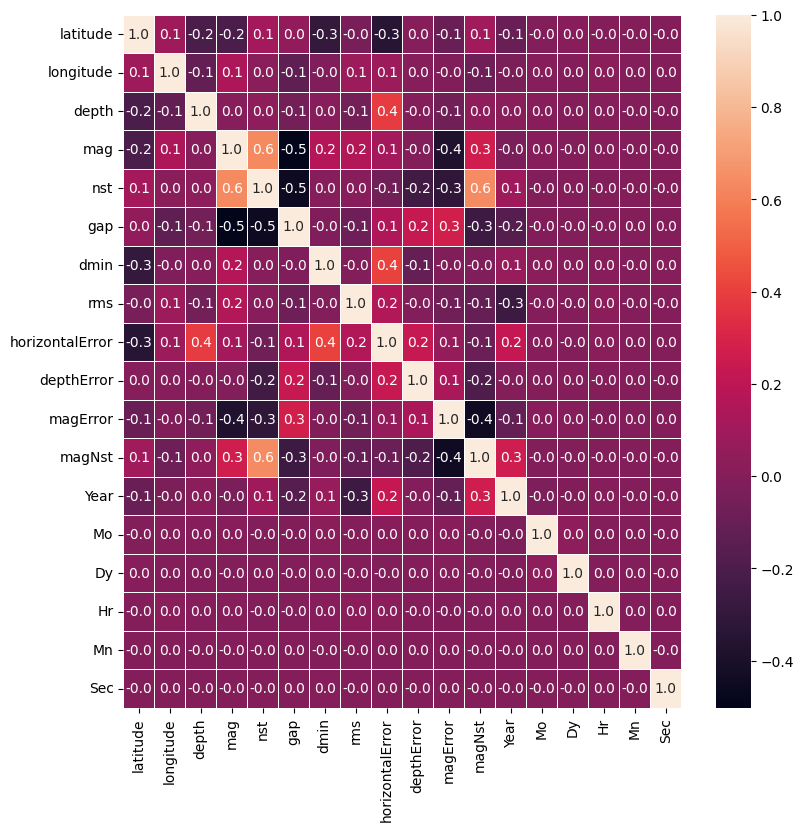

In [149]:
#correlation map
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [132]:
#create a new column based on magnitude ranges
def mag_range(val):
    if val < 4.5:   
        return '3.5 - 4.5'
    elif val < 5.5:
        return '4.5 - 5.5'
    elif val < 6.5:
        return '5.5 - 6.5'
    elif val < 7.5:
        return '6.5 - 7.5'
    else:
        return '7.5 - 8.5'
    
data1['mag_range'] = data1['mag'].apply(mag_range)
data1['mag_range'].value_counts()

3.5 - 4.5    285067
4.5 - 5.5    220592
5.5 - 6.5     18601
6.5 - 7.5      1744
7.5 - 8.5       190
Name: mag_range, dtype: int64

In [133]:
import os
import numpy as np

#make animation
years = data1['Year'].unique()
if not os.path.exists('anim'):
    os.mkdir('anim')
    for i in years:
        df_year = data1[data1['Year'] == i]
        plt.figure(figsize=(20, 15))
        plot = sns.countplot(x='mag_range', data=df_year, palette='viridis')
        plt.title(f'Earthquake Magnitude in {i}')


                                                    

        #Keep y-axis range the maximum and minimum values of all of them
        plot.set_ylim(0, 15000)
      
        
        #Set x-axis labels
        #plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        
    
        x_labels = ['3.5 - 4.5', '4.5 - 5.5', '5.5 - 6.5', '6.5 - 7.5', '7.5 - 8.5']
        
        #Keep x-axis in sorted order
        plot.set_xticklabels(getattr(plot, 'get_xticklabels', lambda: [])(), rotation=90, horizontalalignment='right')
        #Keept x-axis labels in sorted order
        plot.set_xticks(np.arange(len(x_labels)), sorted(x_labels))  
        
        plot.set_xlabel('Magnitude')
        plot.set_ylabel('Number of Earthquakes')
        #Set a tight layout
        plt.tight_layout()
        
        #Save the figure
        plt.savefig(f'anim/earthquake_mag_{i}.png')
        #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
        plt.close()
else:
    print('Animation already exists')

#Create the animation
import imageio
images = []
for i in years:
    images.append(imageio.imread(f'anim/earthquake_mag_{i}.png'))
imageio.mimsave('anim/earthquake_mag.gif', images, duration=0.5)



Animation already exists


In [134]:
#Play the animation
from IPython.display import Image
Image(url='anim\earthquake_mag.gif')

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,status,locationSource,magSource,Year,Mo,Dy,Hr,Mn,Sec,mag_range
214324,3.2950,95.9820,30.0,9.1,mw,601.0,22.0,NaN,1.17,official,...,reviewed,us,official,2004,12,26,0,58,53,7.5 - 8.5
345511,38.2970,142.3730,29.0,9.1,mww,541.0,9.5,NaN,1.16,official,...,reviewed,us,official,2011,3,11,5,46,24,7.5 - 8.5
306026,-36.1220,-72.8980,22.9,8.8,mww,454.0,17.8,NaN,1.09,official,...,reviewed,us,official,2010,2,27,6,34,11,7.5 - 8.5
358212,2.3270,93.0630,20.0,8.6,mw,499.0,16.6,NaN,1.33,official,...,reviewed,us,official,2012,4,11,8,38,36,7.5 - 8.5
245498,2.0850,97.1080,30.0,8.6,mww,510.0,22.1,NaN,0.91,official,...,reviewed,us,official,2005,3,28,16,9,36,7.5 - 8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418716,-55.2852,-31.8766,10.0,7.4,mww,NaN,18.0,2.852,0.79,us,...,reviewed,us,us,2016,8,19,7,32,22,6.5 - 7.5
156276,-4.6800,102.5620,36.0,7.4,mwc,221.0,NaN,NaN,1.31,us,...,reviewed,us,hrv,2001,2,13,19,28,30,6.5 - 7.5
162633,28.8560,139.5560,394.8,7.4,mwc,588.0,NaN,NaN,0.90,us,...,reviewed,us,hrv,2000,8,6,7,27,12,6.5 - 7.5
333967,-28.9930,-176.2380,33.0,7.4,mww,707.0,14.8,NaN,0.87,us,...,reviewed,us,us,2011,10,21,17,57,16,6.5 - 7.5


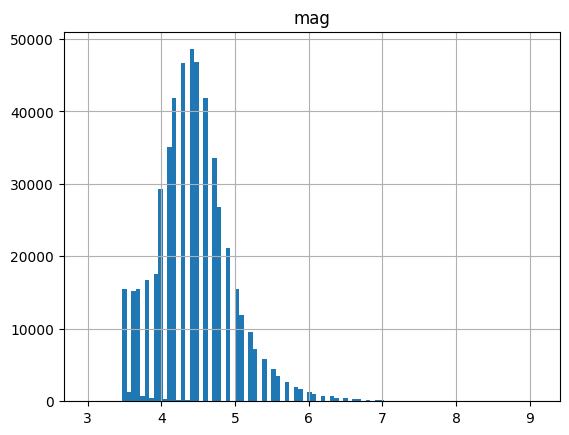

In [135]:
data1.hist(column='mag', bins=100)
data1[(data1['mag']> 7.3) | (data1['mag']==0.0)].sort_values('mag', ascending=False)

## Turkey

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,status,locationSource,magSource,Year,Mo,Dy,Hr,Mn,Sec,mag_range
5643,34.936,30.384,45.2,4.3,mb,Unknown,Unknown,Unknown,1.2,us,...,reviewed,us,us,1982,3,6,8,14,39,3.5 - 4.5


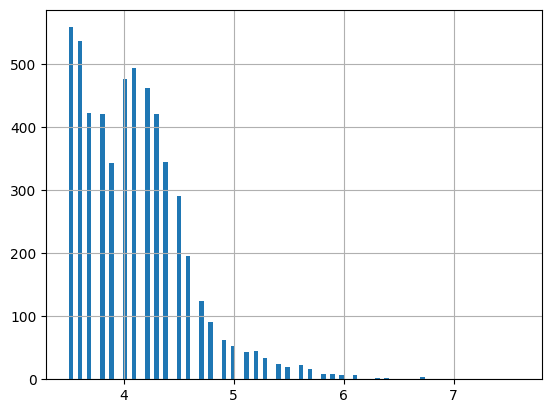

In [136]:
data1.fillna('Unknown', inplace=True)



turkey = data1[data1['place'].str.contains('Turkey')]


turkey['mag'].hist(bins=100)
turkey.head(1)

In [137]:
#
from urllib.request import urlopen
import json
from shapely.geometry import mapping, shape
from shapely.prepared import prep
import folium

with open('geojson/tr-cities.json', 'r',encoding="utf-8-sig") as f:

    geojson = json.load(f)

#Moderate earthquakes in Turkey (Greater than 5.5)
turkey5_5 = turkey[turkey['mag'] > 5.5]


countries = {}
gr = '' # multipolygon
for feature in geojson['features']:
    geom = feature['geometry']
    gr = shape(geom)
    countries['Greece'] = prep(gr)
    
    
    
m = folium.Map(location=turkey5_5[['latitude', 'longitude']].mean().values.tolist(), zoom_start=6, min_zoom=5, max_zoom=7, tiles='cartodbpositron')

folium.GeoJson(geojson, name='geojson').add_to(m)
folium.LatLngPopup().add_to(m) #custom popup of lat and long

bound1 = [39.5, 26.5]
bound2 = [42.5, 44.5]
m.fit_bounds([bound1, bound2])

#Most powerful earthquakes in Turkey
for i in range(0, len(turkey5_5)):
    folium.CircleMarker(location=[turkey5_5.iloc[i]['latitude'], turkey5_5.iloc[i]['longitude']],
                        radius=5,
                        popup=folium.Popup(turkey5_5.iloc[i]['mag']),
                        color='crimson',
                        fill=True,
                        fill_color='crimson'
                       ).add_to(m)


m

<a href = "https://www.mtu.edu/geo/community/seismology/learn/earthquake-measure/magnitude/">Determining the Magnitude of an Earthquake</a>

* minor = (0; 2.5]
* light = (2.5; 5.4]
* moder = (5.5; 6.0]
* major = (6.1; 6.9]
* great > 6.9


In [138]:
eq_minor = turkey[turkey['mag'] < 2.5]
eq_light = turkey[(turkey['mag'] >= 2.5) & (turkey['mag'] < 5.4)]
eq_moderate = turkey[(turkey['mag'] >= 5.5) & (turkey['mag'] < 6.0)]
eq_strong = turkey[(turkey['mag'] >= 6.1) & (turkey['mag'] < 6.9)]
eq_major = turkey[turkey['mag'] >= 7.0]

In [139]:
#Create a new column based on magnitude ranges
def eq_range(val):
    if val < 2.5:   
        return 'Minor'
    elif val < 5.5:
        return 'Light'
    elif val < 6.0:
        return 'Moderate'
    elif val < 6.9:
        return 'Strong'
    else:
        return 'Major'
    
turkey['eq_range'] = turkey['mag'].apply(eq_range)
turkey['eq_range'].value_counts()
    

Light       5440
Moderate      74
Strong        24
Major          3
Name: eq_range, dtype: int64

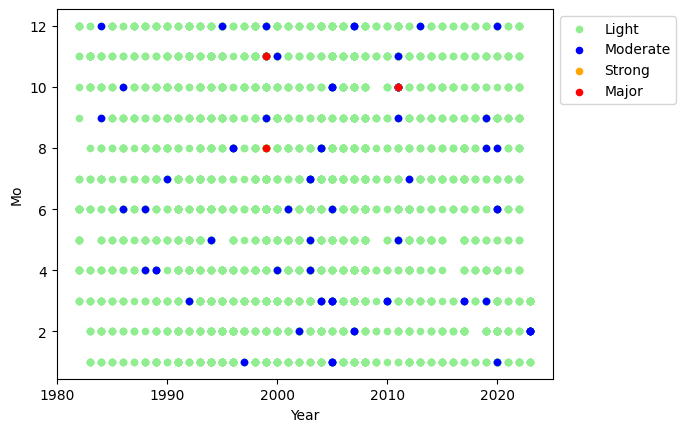

In [140]:
ax1 = eq_light.plot(kind='scatter', x='Year', y='Mo', color='lightgreen', label='Light')
ax2 = eq_moderate.plot(kind='scatter', x='Year', y='Mo', color='blue',  label='Moderate', ax=ax1)
ax3 = eq_major.plot(kind='scatter', x='Year', y='Mo', color='orange', label='Strong',  ax=ax1)
ax4 = eq_major.plot(kind='scatter', x='Year', y='Mo', color='red', label='Major',  ax=ax1)
ax1.legend(bbox_to_anchor=(1., 1.))

Text(0.5, 0, 'Year')

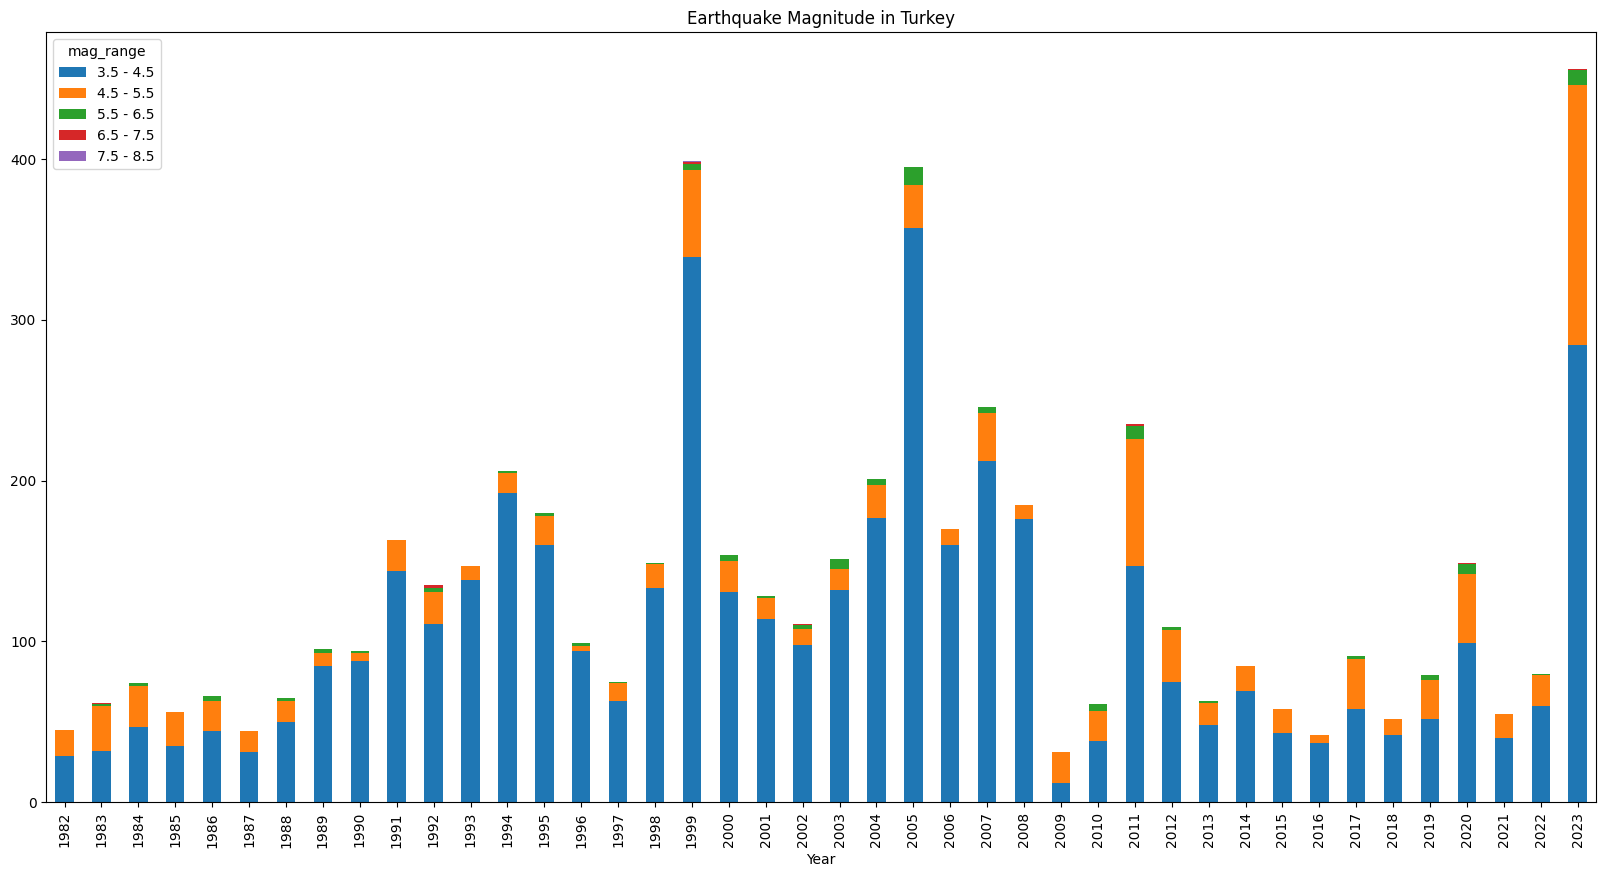

In [141]:
pd.crosstab(turkey['Year'], turkey['mag_range']).plot(kind='bar', stacked=True, figsize=(20, 10))
years = [1983, 1992, 1995, 1998, 1999, 2002, 2003, 2011, 2014, 2017, 2020, 2023]
plt.title('Earthquake Magnitude in Turkey')
plt.xlabel('Year')

In [142]:
#Select years 2023
eq_tr_2023 = turkey[turkey['Year'] == 2023]
eq_tr_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 512035 to 508994
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         456 non-null    float64
 1   longitude        456 non-null    float64
 2   depth            456 non-null    float64
 3   mag              456 non-null    float64
 4   magType          456 non-null    object 
 5   nst              456 non-null    object 
 6   gap              456 non-null    object 
 7   dmin             456 non-null    object 
 8   rms              456 non-null    object 
 9   net              456 non-null    object 
 10  id               456 non-null    object 
 11  updated          456 non-null    object 
 12  place            456 non-null    object 
 13  type             456 non-null    object 
 14  horizontalError  456 non-null    object 
 15  depthError       456 non-null    object 
 16  magError         456 non-null    object 
 17  magNst  

<a href= "https://www.usgs.gov/programs/earthquake-hazards/determining-depth-earthquake#:~:text=Shallow%20earthquakes%20are%20between%200,%2C%20300%20%2D%20700%20km%20deep.
">Determining the depth of an earthquake</a>
* Shallow earthquakes - between 0 and 70 km deep
* Intermediate earthquakes - 70 - 300 km deep,
* Deep earthquakes, 300 - 700 km deep.

In [143]:
eq_shallow = turkey[turkey['depth'] < 70]
eq_intermadiate = turkey[(turkey['depth'] >= 70) & (turkey['depth'] < 300)]
eq_deep = turkey[turkey['depth'] >= 300]


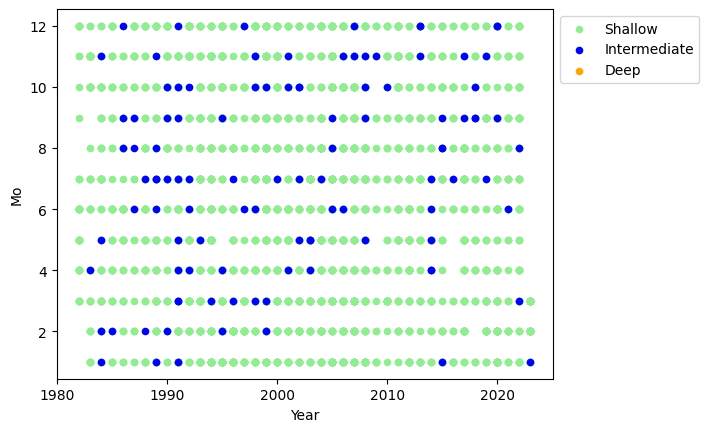

In [144]:
ax1 = eq_shallow.plot(kind='scatter', x='Year', y='Mo', color='lightgreen', label='Shallow')
ax2 = eq_intermadiate.plot(kind='scatter', x='Year', y='Mo', color='blue',  label='Intermediate', ax=ax1)
ax3 = eq_deep.plot(kind='scatter', x='Year', y='Mo', color='orange', label='Deep',  ax=ax1)
ax1.legend(bbox_to_anchor=(1., 1.))
    

In [145]:
#Create a new column for earthquake depth range
def depth_range(val):
    if val < 70:   
        return 'Shallow'
    elif val < 300:
        return 'Intermediate'
    else:
        return 'Deep'
    
turkey['depth_range'] = turkey['depth'].apply(depth_range)
turkey['depth_range'].value_counts()


Shallow         5436
Intermediate     105
Name: depth_range, dtype: int64

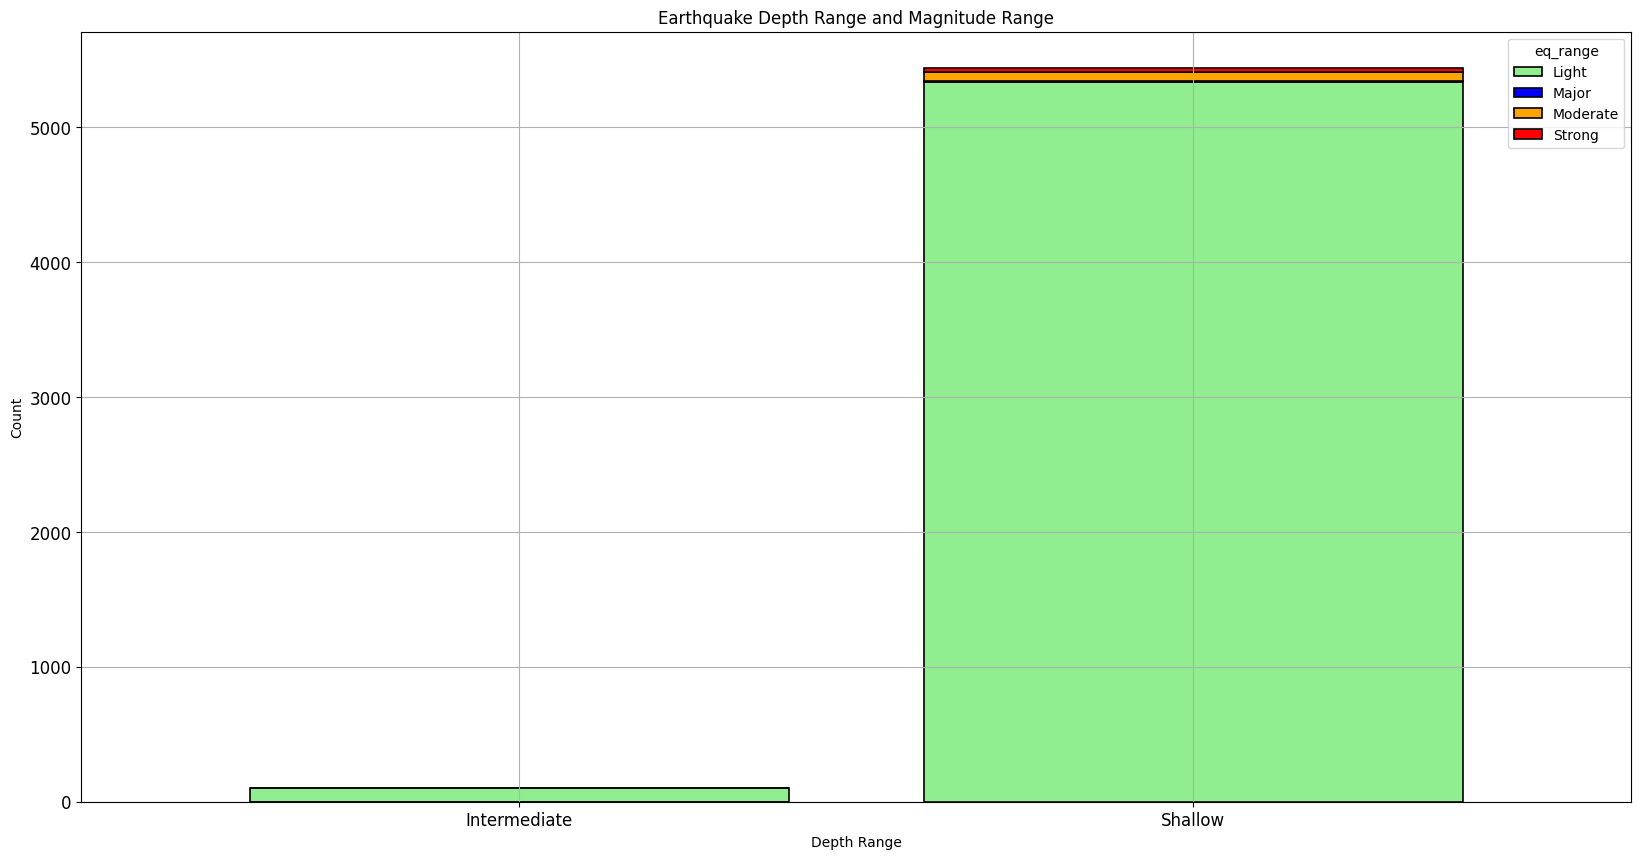

In [173]:
#Relationship between depth range and magnitude range

#bar plot
turkey.groupby(['depth_range', 'eq_range']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10), 
                                                                  title='Earthquake Depth Range and Magnitude Range', 
                                                                  fontsize=12, color=['lightgreen', 'blue', 'orange', 'red',
                                                                                      'crimson'], rot=0, width=0.8,
                                                                                        edgecolor='black', linewidth=1.2,
                                                                                        grid=True,
                                                                                        xlabel='Depth Range',
                                                                                        ylabel='Count');

